## Analyse the programming language tends

## 1. Business Understanding 

After recieving my degree in Civil Engineering, I am planing to work as a professional developer in furture in Germany, USA or China. Therefore, I am very interested in the popularity of programming langauges in these three countries. In this notebook, based on the survey performed by Stack Overflow in 2020 (https://insights.stackoverflow.com/survey), following questions are answered: 
- Which languages are mostly used by professional developers? 
- Which languages are mostly desired by professional developers? 
- Is this conclusion influeced by countries? 
- Do developers with CS background and from other undergraduate major make the same choice? 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## 2. Data Understanding

Firtly, the survey data is imported.

In [9]:
# show all rows 
pd.set_option('display.max_rows', None)

# load the data
survey_full = pd.read_csv('./data/survey_results_public.csv')
survey_full.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


### 2.1 Columns of the dataframe

In [10]:
# columns of the dataframe
survey_full.columns.values

array(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode',
       'CompFreq', 'CompTotal', 'ConvertedComp', 'Country',
       'CurrencyDesc', 'CurrencySymbol', 'DatabaseDesireNextYear',
       'DatabaseWorkedWith', 'DevType', 'EdLevel', 'Employment',
       'Ethnicity', 'Gender', 'JobFactors', 'JobSat', 'JobSeek',
       'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith',
       'NEWDevOps', 'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt',
       'NEWJobHuntResearch', 'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood',
       'NEWOtherComms', 'NEWOvertime', 'NEWPurchaseResearch',
       'NEWPurpleLink', 'NEWSOSites', 'NEWStuck', 'OpSys', 'OrgSize',
       'PlatformDesireNextYear', 'PlatformWorkedWith', 'PurchaseWhat',
       'Sexuality', 'SOAccount', 'SOComm', 'SOPartFreq', 'SOVisitFreq',
       'SurveyEase', 'SurveyLength', 'Trans', 'UndergradMajor',
       'WebframeDesir

Obviously, only these columns are related to my question: 'Respondent', 'Country', 'LanguageDesireNextYear', 'LanguageWorkedWith','UndergradMajor'. Besides, the column 'MainBranch' is also needed to filter the answers from profensionel developers.

### 2.2 Format of the language columns

In [11]:
survey_full[['LanguageDesireNextYear','LanguageWorkedWith']].head()

,LanguageDesireNextYear,LanguageWorkedWith
0,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript
1,Python;Swift,JavaScript;Swift
2,Objective-C;Python;Swift,Objective-C;Python;Swift
3,NaN,NaN
4,Java;Ruby;Scala,HTML/CSS;Ruby;SQL


Another problem is that the programming languages are stored in the columns as strings seperated by `;`. The first idea occurs to me is to seperate each string by `;`, store it as list, and then count the number using loops. 

## 3. Data preparation

As discussed above, the data is prepared following two steps: 

1. select the related rows/columns 
2. process the two languages columns 

Of course, missing values should also be handeled if there are any. 

### 3.1 Select related rows by `MainBranch`

In [19]:
 # select developers based on column `MainBranch`

survey = survey_full[survey_full.MainBranch == 'I am a developer by profession'].loc[:,col_itrs]

### 3.2 Select related columns

In [20]:
# The columns I am intersted in 
col_itrs = ['Respondent', 'Country', 'LanguageDesireNextYear', 'LanguageWorkedWith','UndergradMajor'] 

# Filter countries 

survey = survey[survey.Country.isin(['Germany','China',"United States"])]
survey.head()

,Respondent,Country,LanguageDesireNextYear,LanguageWorkedWith,UndergradMajor
0,1,Germany,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,"Computer science, computer engineering, or sof..."
5,6,Germany,HTML/CSS;Java;JavaScript,HTML/CSS;Java;JavaScript,NaN
7,8,United States,JavaScript,Python;SQL,"Computer science, computer engineering, or sof..."
13,14,United States,HTML/CSS;JavaScript;SQL;TypeScript,HTML/CSS;JavaScript;SQL;TypeScript,"Computer science, computer engineering, or sof..."
16,17,United States,C#;Go;Haskell;HTML/CSS;JavaScript;Python;Ruby;...,C#;HTML/CSS;JavaScript;Python;SQL;VBA,"Computer science, computer engineering, or sof..."


### 3.3 Check against missing values 

In [23]:
# check missing values 
survey.isnull().sum()

Respondent                   0
Country                      0
LanguageDesireNextYear    1509
LanguageWorkedWith         797
UndergradMajor            1461
dtype: int64

In columns `LanguageDesireNextYear`, `LanguageWorkedWith` and `UndergradMajor`, missing values can be observed. Based on my purpose, the values in `UndergradMajor` is required to seperate the developers. Therefore, the answers where the `UndergradMajor` is missing have to be removed. 

In contrast, missing values in `LanguageDesireNextYear` and `LanguageWorkedWith` are allowed, because I am interesed in the sum of each programming languages appear in the answers. Simply drop one row with a missing value in either of these two columns might lead to missing of information. 

In [34]:
# drop rows with miss value in column UndergradMajor
survey.dropna(subset=['UndergradMajor'],inplace = True)
survey.isnull().sum()

Respondent                   0
Country                      0
LanguageDesireNextYear    1149
LanguageWorkedWith         526
UndergradMajor               0
dtype: int64

### 3.4 Process column `language` 

To acquire the number of each programming languages appears in the survey, the function below is defined.  


In [70]:
def language_count(df = survey, anl_col='LanguageDesireNextYear', flt_col = 'Country', flt = ['Germany', 'United States', 'China']):
    """ 
    Return the numbers of each languages.

    Input: 
        df (dataframe) : input dataframe
        anl_col (str): column to be analysed
        flt_col (str) : column used as filter
        flt (list of str) : list of filters  

    Output: 
        language_count (pd.Series) : count of the languages 
    """

    df_temp = df[df.loc[:,flt_col].isin(flt)].loc[:,anl_col]

    list_temp = df_temp.str.split(pat = ';').to_list()

    language_count = dict()

    for _ in list_temp:  
        if  type(_) == list : 
            for item in _: 
                if item in (list(language_count.keys())):
                    language_count[item] += 1
                else:
                    language_count[item] = 1

    return pd.Series(language_count).sort_values(ascending = False)

### 3.5 Simplify the content of the column `UndergradMajor`

In [37]:
# We group the UndergradMajor into 'CS' and 'Not CS' 

origin = list(survey.UndergradMajor.unique())
rplc = ['Not CS'] *len(origin)
rplc[0] = 'CS'

# Replace the content of the column 

survey.replace(origin, rplc, inplace = True)
survey.head()

,Respondent,Country,LanguageDesireNextYear,LanguageWorkedWith,UndergradMajor
0,1,Germany,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,CS
7,8,United States,JavaScript,Python;SQL,CS
13,14,United States,HTML/CSS;JavaScript;SQL;TypeScript,HTML/CSS;JavaScript;SQL;TypeScript,CS
16,17,United States,C#;Go;Haskell;HTML/CSS;JavaScript;Python;Ruby;...,C#;HTML/CSS;JavaScript;Python;SQL;VBA,CS
17,18,United States,HTML/CSS;Perl,Bash/Shell/PowerShell;HTML/CSS;Perl,CS


## 4. Data Analysis
### 4.1 The most used programming language & Country  

In [44]:
language_ww_dict_us

Series([], dtype: float64)

Text(0.5, 1.0, 'China')

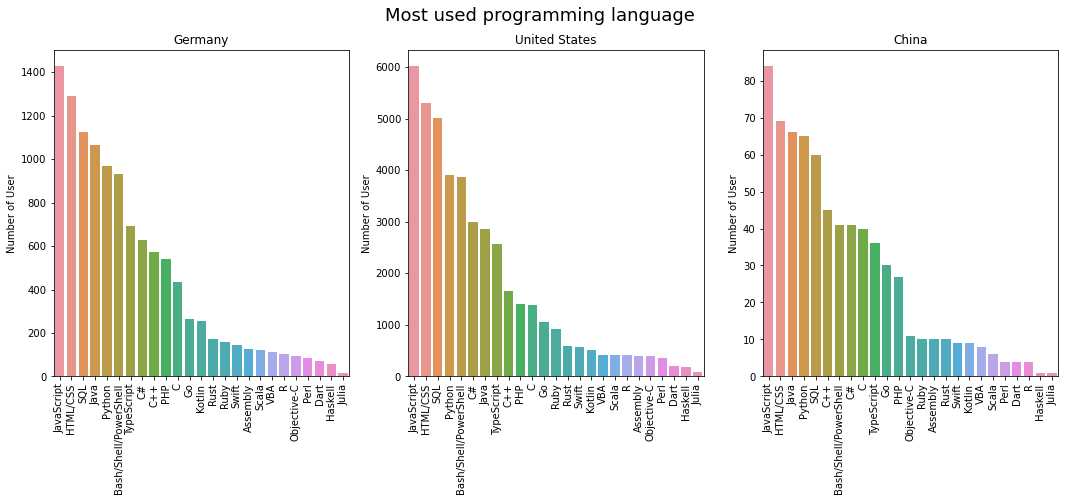

In [71]:
# process data 

language_ww_dict_de = language_count(survey, 'LanguageWorkedWith','Country',['Germany'])
language_ww_dict_us = language_count(survey, 'LanguageWorkedWith','Country',['United States'])
language_ww_dict_cn = language_count(survey, 'LanguageWorkedWith','Country',['China'])

# plot 

fig, axes = plt.subplots(1,3,figsize=(18,6))
plt.tight_layout(rect=[0, 1, 1, 0.95])
fig.suptitle('Most used programming language', fontsize = 18)

sns.barplot(ax=axes[0], x = language_ww_dict_de.index, y = language_ww_dict_de.values)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_ylabel('Number of User')
axes[0].set_title('Germany')

sns.barplot(ax=axes[1], x = language_ww_dict_us.index, y = language_ww_dict_us.values)
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_ylabel('Number of User')
axes[1].set_title('United States')

sns.barplot(ax=axes[2], x = language_ww_dict_cn.index, y = language_ww_dict_cn.values)
axes[2].tick_params(axis='x', rotation=90)
axes[2].set_ylabel('Number of User')
axes[2].set_title('China')

### 4.2 The most desired programming language & Country

Text(0.5, 1.0, 'China')

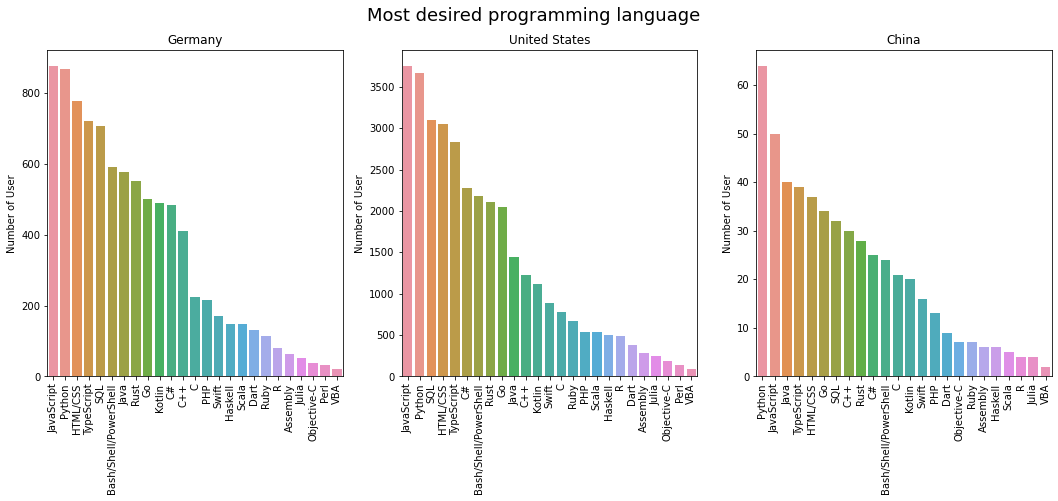

In [72]:
# process data 

language_dw_dict_de = language_count(survey, 'LanguageDesireNextYear','Country',['Germany'])
language_dw_dict_us = language_count(survey, 'LanguageDesireNextYear','Country',['United States'])
language_dw_dict_cn = language_count(survey, 'LanguageDesireNextYear','Country',['China'])

# plot

fig, axes = plt.subplots(1,3,figsize=(18,6))
plt.tight_layout(rect=[0, 1, 1, 0.95])
fig.suptitle('Most desired programming language', fontsize = 18)

sns.barplot(ax=axes[0], x = language_dw_dict_de.index, y = language_dw_dict_de.values)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_ylabel('Number of User')
axes[0].set_title('Germany')

sns.barplot(ax=axes[1], x = language_dw_dict_us.index, y = language_dw_dict_us.values)
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_ylabel('Number of User')
axes[1].set_title('United States')

sns.barplot(ax=axes[2], x = language_dw_dict_cn.index, y = language_dw_dict_cn.values)
axes[2].tick_params(axis='x', rotation=90)
axes[2].set_ylabel('Number of User')
axes[2].set_title('China')

### 4.3 The most used programming language & Undergradmajor 


Text(0.5, 1.0, 'Not CS')

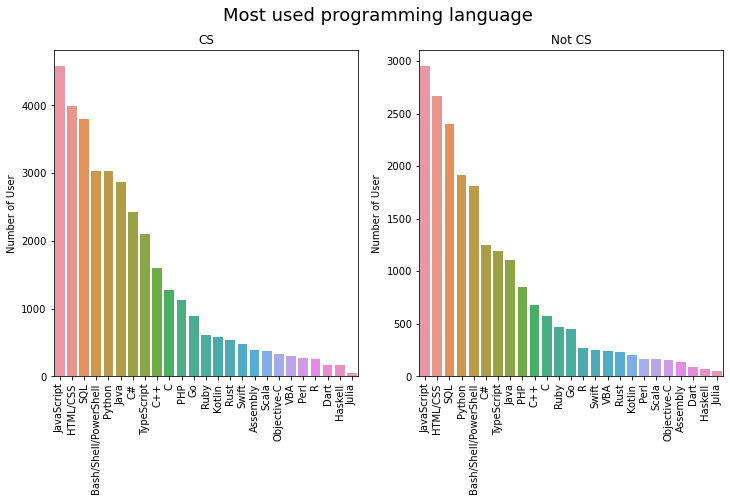

In [73]:

# process data 
language_ww_dict_cs = language_count(survey, 'LanguageWorkedWith','UndergradMajor',['CS'])
language_ww_dict_ncs = language_count(survey, 'LanguageWorkedWith','UndergradMajor',['Not CS'])

fig, axes = plt.subplots(1,2,figsize=(12,6))
plt.tight_layout(rect=[0, 1, 1, 0.95])
fig.suptitle('Most used programming language', fontsize = 18)

sns.barplot(ax=axes[0], x = language_ww_dict_cs.index, y = language_ww_dict_cs.values)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_ylabel('Number of User')
axes[0].set_title('CS')

sns.barplot(ax=axes[1], x = language_ww_dict_ncs.index, y = language_ww_dict_ncs.values)
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_ylabel('Number of User')
axes[1].set_title('Not CS')

### 4.4 The most desired programming language & Undergradmajor 

Text(0.5, 1.0, 'Not CS')

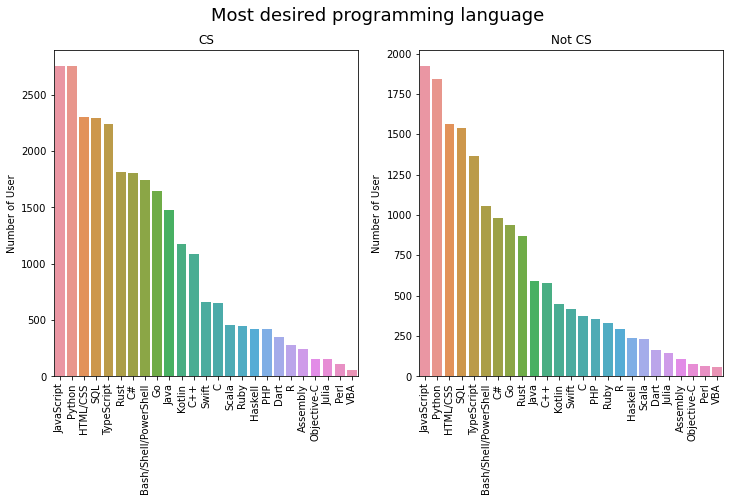

In [74]:
# process data 
language_dw_dict_cs = language_count(survey, 'LanguageDesireNextYear','UndergradMajor',['CS'])
language_dw_dict_ncs = language_count(survey, 'LanguageDesireNextYear','UndergradMajor',['Not CS'])

fig, axes = plt.subplots(1,2,figsize=(12,6))
plt.tight_layout(rect=[0, 1, 1, 0.95])
fig.suptitle('Most desired programming language', fontsize = 18)

sns.barplot(ax=axes[0], x = language_dw_dict_cs.index, y = language_dw_dict_cs.values)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_ylabel('Number of User')
axes[0].set_title('CS')

sns.barplot(ax=axes[1], x = language_dw_dict_ncs.index, y = language_dw_dict_ncs.values)
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_ylabel('Number of User')
axes[1].set_title('Not CS')

## 5. Conclusions 

Based on the analysis above, following conclusions can be drawn: 

1. `JavaScript` is the most widely used programming language by professional developers in all three countries. 
2. In China, most developers want to learn `Python` in coming year. But in Germany and USA, it is still `JavaScript`. 
3. The difference between developers majored in CS and in other disiplines can hardly be observed. Which is probabaly a good news for me. :)
